In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits # used to load a temporary dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import random
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random.seed(2023)

#### All Facial Expressions + No Face Cropping - Baseline Log Reg
We use simple neural network with a softmax output layer to model multi-class logistic regression.
https://towardsdatascience.com/multiclass-logistic-regression-from-scratch-9cc0007da372 

In [20]:
#import data
#read the data
#The data is read from the directory and each batch can be thought of as a set of labels and datapoints
#Might need to change the directory depending on where

#50
train = keras.utils.image_dataset_from_directory(
    directory='../../data/Faces updated',
    labels='inferred', # i.e. directory: Faces/Angry, angry refers to the class label
    label_mode='categorical', # one hot encoded vectors
    batch_size=140, 
    image_size=(1000, 1000),
    validation_split = 0.2,
    subset = 'training',
    seed = 50
    )

validation = keras.utils.image_dataset_from_directory(
    directory='../../data/Faces updated',
    labels='inferred',
    label_mode='categorical',
    batch_size=140,
    image_size=(1000, 1000),
    validation_split = 0.2,
    subset = 'validation',
    seed = 50
    )

Found 154 files belonging to 3 classes.
Using 124 files for training.
Found 154 files belonging to 3 classes.
Using 30 files for validation.


In [22]:
model = Sequential([
    Flatten(input_shape=(1000, 1000, 3)), 
    Dense(3, activation='softmax')  # number of classes (facial expressions)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),  
    loss='categorical_crossentropy',  # cross entropy loss for multi-class classification
    metrics=['accuracy']  
)

history = model.fit(
    train,  
    validation_data=validation,
    epochs=10  
)


Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 123.5003 - accuracy: 0.2500 - val_loss: 565398.0625 - val_accuracy: 0.3667
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 606462.7500 - accuracy: 0.3226 - val_loss: 354136.0625 - val_accuracy: 0.3667
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 376226.0312 - accuracy: 0.3226 - val_loss: 43703.6758 - val_accuracy: 0.2667
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 38879.2656 - accuracy: 0.3468 - val_loss: 261091.5469 - val_accuracy: 0.3667
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 253827.1250 - accuracy: 0.3306 - val_loss: 261543.2812 - val_accuracy: 0.3667
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 247232.2969 - accuracy: 0.3306 - val_loss: 137815.7031 - val_accuracy: 0.3000
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 117075.4453 - accuracy: 0.4113 - val_loss: 146635.0312

Logistic regression is quite simple and might not perform as well as more complex models (like CNNs) for high-dimensional data like images, especially for a task as complex as facial expression recognition. If accuracy is insufficient, consider using a more sophisticated model architecture.

1/1 [==============================] - 0s 365ms/step - loss: 483945.8125 - accuracy: 0.2500
Validation Accuracy: 25.00%
1/1 [==============================] - 0s 267ms/step


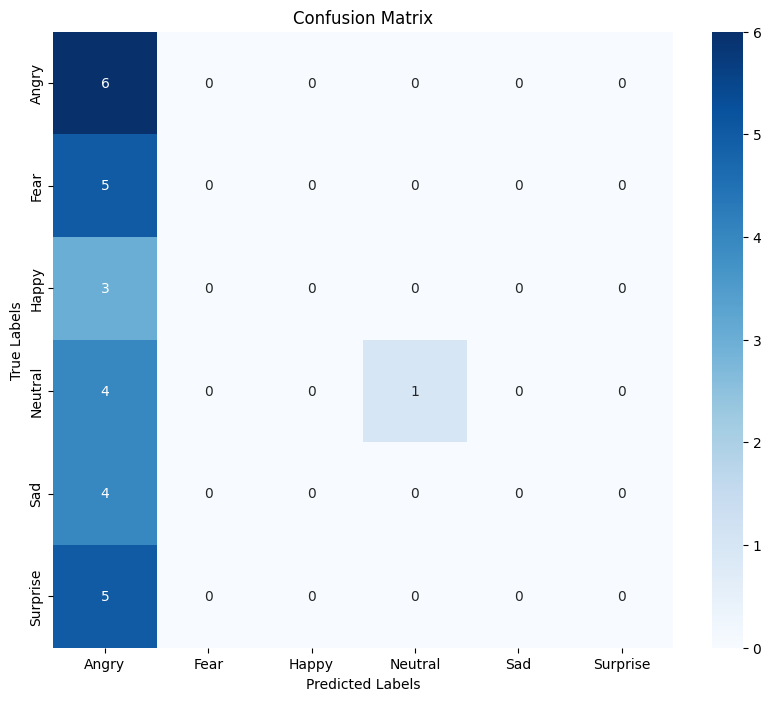

Predicted: Angry, Actual: Neutral
Predicted: Angry, Actual: Angry
Predicted: Angry, Actual: Angry
Predicted: Angry, Actual: Angry
Predicted: Angry, Actual: Fear
Predicted: Angry, Actual: Surprise
Predicted: Angry, Actual: Sad
Predicted: Angry, Actual: Neutral
Predicted: Angry, Actual: Fear
Predicted: Angry, Actual: Fear
Predicted: Angry, Actual: Sad
Predicted: Angry, Actual: Surprise
Predicted: Angry, Actual: Neutral
Predicted: Angry, Actual: Surprise
Predicted: Neutral, Actual: Neutral
Predicted: Angry, Actual: Surprise
Predicted: Angry, Actual: Happy
Predicted: Angry, Actual: Sad
Predicted: Angry, Actual: Happy
Predicted: Angry, Actual: Fear
Predicted: Angry, Actual: Surprise
Predicted: Angry, Actual: Angry
Predicted: Angry, Actual: Angry
Predicted: Angry, Actual: Neutral
Predicted: Angry, Actual: Fear
Predicted: Angry, Actual: Happy
Predicted: Angry, Actual: Sad
Predicted: Angry, Actual: Angry


In [8]:
val_loss, val_accuracy = model.evaluate(validation)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# 2. Use a single pass through the validation dataset for prediction and true labels extraction
y_pred = []
y_true = []

for images, labels in validation:
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)
    true = np.argmax(labels.numpy(), axis=1)

    y_pred.extend(preds)
    y_true.extend(true)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation.class_names, yticklabels=validation.class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

for i in range(len(y_true)):  # Just the first 5 predictions
    print(f"Predicted: {validation.class_names[y_pred[i]]}, Actual: {validation.class_names[y_true[i]]}")

#### KNN

In [12]:
data = keras.utils.image_dataset_from_directory(
    directory='../../data/Faces updated',
    labels='inferred',
    label_mode='categorical',
    batch_size=154, # change depending on total length of dataset
    image_size=(1000, 1000),
)

#convert to numpy array
numpy_generator = data.as_numpy_iterator()
X, y = numpy_generator.next()

Found 154 files belonging to 3 classes.


In [13]:
print(X.shape, '\n', y.shape)

(154, 1000, 1000, 3) 
 (154, 3)


In [14]:
# flatten X into 1d vector
X_flatten = X.reshape(X.shape[0], -1)
# reshape y into single label
y_labels = np.argmax(y, axis=1)

In [15]:
# use keras train split
X_train, X_test, y_train, y_test = train_test_split(X_flatten, y_labels, test_size=0.2, random_state=42)

In [16]:
y_test.shape

(31,)

PCA

In [17]:
pca = PCA(n_components=50) # adjust later
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test) # reduce bias by just using the scaling done on training data on the testing data

# Check the shape of the transformed data
print("Shape of PCA-transformed data:", X_train_pca.shape)  # This will print (n_samples, 50)

# Check the number of components used
print("Number of components used:", pca.n_components_)

# Check the explained variance ratio
print("Explained variance ratio per component:", pca.explained_variance_ratio_)
print("Sum of explained variance ratio:", np.sum(pca.explained_variance_ratio_))


Shape of PCA-transformed data: (123, 50)
Number of components used: 50
Explained variance ratio per component: [0.20873886 0.13993105 0.10850352 0.06059178 0.05843353 0.03807565
 0.02969885 0.0283931  0.02214068 0.01946106 0.01697953 0.01478199
 0.01399252 0.01162418 0.01072107 0.01040351 0.00933408 0.00888595
 0.00823904 0.00797872 0.00712269 0.00662235 0.00650001 0.00626555
 0.00620633 0.0058975  0.00543864 0.00534119 0.005187   0.00473543
 0.0045752  0.00440867 0.00421154 0.00399139 0.00371411 0.00364271
 0.00339778 0.00319208 0.00316346 0.00302488 0.00280465 0.00277138
 0.00262196 0.00249755 0.00248568 0.00230608 0.00229747 0.00220894
 0.00209173 0.00202028]
Sum of explained variance ratio: 0.94765294


In [18]:
knn_model = KNeighborsClassifier(n_neighbors=3) # adjust later using elbow
knn_model.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = knn_model.predict(X_test_pca)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.7419354838709677
Confusion Matrix:
 [[ 5  0  1]
 [ 1  8  3]
 [ 1  2 10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.80      0.67      0.73        12
           2       0.71      0.77      0.74        13

    accuracy                           0.74        31
   macro avg       0.74      0.76      0.75        31
weighted avg       0.75      0.74      0.74        31



In [ ]:
print(y_pred)
print(y_test)

[0 2 4 3 2 2 2 5 5 2 1 3 1 2 5 0 0 1 1 5 2 0 1 0 0 0 2 2]
[0 5 4 3 2 2 1 5 0 5 1 3 1 2 3 5 0 1 5 5 3 3 1 3 4 0 2 2]


In [ ]:
y_train_pred = knn_model.predict(X_train_pca)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 84.82%


In [ ]:
def predict_metrics(y_pred, y_test):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    df = pd.DataFrame(data={"metrics": ["accuracy", "recall", "precision", "f1"], "values": [accuracy, recall, precision, f1]}, )
    
    return df

# Predict the labels for the test set
y_pred = knn.predict(X_test)

predict_metrics(y_pred, y_test)

#### with updated categorisation of facial images

In [ ]:
train = keras.utils.image_dataset_from_directory(
    directory='../../data/Faces updated',
    labels='inferred',
    label_mode='categorical',
    batch_size=140,
    image_size=(1000, 1000),
    validation_split = 0.2,
    subset = 'training',
    seed = 50,
   
    color_mode = 'grayscale'
    )

validation = keras.utils.image_dataset_from_directory(
    directory='../../data/Faces updated',
    labels='inferred',
    label_mode='categorical',
    batch_size=140,
    image_size=(1000, 1000),
    validation_split = 0.2,
    subset = 'validation',
    seed = 50,
   # class_names = ['Happy', 'Sad', 'Neutral'],
    color_mode = 'grayscale'
    )

NotFoundError: Could not find directory ../../data/Faces updated

In [ ]:
#convert to numpy images and then perform PCA to extract the values
#convert images to numpy
train_processed_numpy = train.as_numpy_iterator()
validation_processed_numpy = validation.as_numpy_iterator()

X_train, y_train = train_processed_numpy.next()
X_val, y_val = validation_processed_numpy.next()

## later

In [ ]:
data = keras.utils.image_dataset_from_directory(
    directory='../data/Faces',
    labels='inferred',
    label_mode='categorical',
    batch_size=140,
    image_size=(1000,1000),
    class_names=['Happy', 'Sad', 'Neutral']
)

data

ValueError: The `class_names` passed did not match the names of the subdirectories of the target directory. Expected: ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'], but received: ['Happy', 'Sad', 'Neutral']

In [ ]:
# SEED = 0

# # Load the a dataset -- handwritten numbers, digits dataset used as temporary dataset
# dataset = load_digits()
# X = dataset["data"]
# y = dataset["target"]

In [ ]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## KNN

In [ ]:
N_NEIGHBOURS = 10

# Initialize the KNN classifier
knn = KNeighborsClassifier(N_NEIGHBOURS)  

In [ ]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
def predict_metrics(y_pred, y_test):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    df = pd.DataFrame(data={"metrics": ["accuracy", "recall", "precision", "f1"], "values": [accuracy, recall, precision, f1]}, )
    
    return df

# Predict the labels for the test set
y_pred = knn.predict(X_test)

predict_metrics(y_pred, y_test)

,metrics,values
0,accuracy,0.972222
1,recall,0.972222
2,precision,0.973575
3,f1,0.971993


## ANN (Artificial Neural Network)

In [ ]:
ann = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=SEED)

In [ ]:
# Train the classifier
ann.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=0)

In [ ]:
# Predict the labels for the test set
y_pred = ann.predict(X_test)

predict_metrics(y_pred, y_test)

,metrics,values
0,accuracy,0.969444
1,recall,0.969444
2,precision,0.969547
3,f1,0.969339


### ANN but Keras

In [ ]:
keras.utils.set_random_seed(SEED)

ann2 = Sequential()
ann2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann2.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
ann2.add(Dense(1))  
ann2.compile(loss='mean_squared_error', optimizer='adam')

ann2.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

/Users/szeyinglim/miniforge3/envs/is4242/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Predict the labels for the test set
y_pred = ann.predict(X_test)

predict_metrics(y_pred, y_test)

,metrics,values
0,accuracy,0.969444
1,recall,0.969444
2,precision,0.969547
3,f1,0.969339


## KMeans

I think don't use KMeans cause it's unsupervised and so don't have like the accuracy, recall, precision and f1 metrics

In [ ]:
# Initialize KMeans with appropriate number of clusters
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)

# Predict cluster labels
cluster_labels = kmeans.labels_

#### Limiting to 3 Facial Expressions (Happy, Sad, Neutral) + No Face Cropping

In [ ]:
data = keras.utils.image_dataset_from_directory(
    directory='../data/Faces',
    labels='inferred',
    label_mode='categorical',
    batch_size=140,
    image_size=(1000,1000),
    class_names=['Happy', 'Sad', 'Neutral'] # subset of classes
)

data